# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sun Mar  8 15:33:32 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


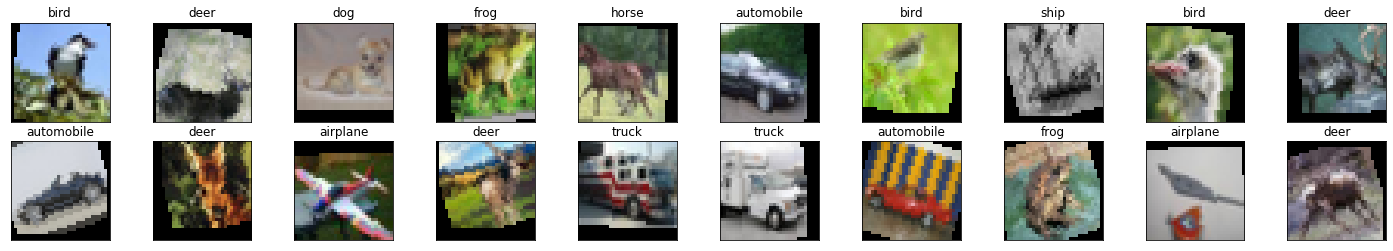

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0.001)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
                                        verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.315845251083374 Batch_id=390 Accuracy=44.13: 100%|██████████| 391/391 [00:50<00:00,  7.78it/s] 



Test set: Average loss: 0.0095, Accuracy: 5797/10000 (57.97%)

Validation accuracy increased (0.000000 --> 57.970000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=0.9109913110733032 Batch_id=390 Accuracy=61.69: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]



Test set: Average loss: 0.0092, Accuracy: 6201/10000 (62.01%)

Validation accuracy increased (57.970000 --> 62.010000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.5359816551208496 Batch_id=390 Accuracy=68.81: 100%|██████████| 391/391 [00:53<00:00,  7.30it/s]



Test set: Average loss: 0.0059, Accuracy: 7394/10000 (73.94%)

Validation accuracy increased (62.010000 --> 73.940000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.8097795248031616 Batch_id=390 Accuracy=73.30: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]



Test set: Average loss: 0.0058, Accuracy: 7560/10000 (75.60%)

Validation accuracy increased (73.940000 --> 75.600000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=0.7597699165344238 Batch_id=390 Accuracy=75.94: 100%|██████████| 391/391 [01:00<00:00,  6.52it/s] 



Test set: Average loss: 0.0056, Accuracy: 7675/10000 (76.75%)

Validation accuracy increased (75.600000 --> 76.750000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


Loss=0.5256098508834839 Batch_id=390 Accuracy=78.27: 100%|██████████| 391/391 [01:00<00:00,  6.41it/s] 



Test set: Average loss: 0.0045, Accuracy: 8058/10000 (80.58%)

Validation accuracy increased (76.750000 --> 80.580000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


Loss=0.5326783657073975 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s] 



Test set: Average loss: 0.0046, Accuracy: 8066/10000 (80.66%)

Validation accuracy increased (80.580000 --> 80.660000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


Loss=0.35362157225608826 Batch_id=390 Accuracy=81.41: 100%|██████████| 391/391 [01:01<00:00,  6.31it/s]



Test set: Average loss: 0.0042, Accuracy: 8227/10000 (82.27%)

Validation accuracy increased (80.660000 --> 82.270000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


Loss=0.525281548500061 Batch_id=390 Accuracy=82.35: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]  



Test set: Average loss: 0.0039, Accuracy: 8388/10000 (83.88%)

Validation accuracy increased (82.270000 --> 83.880000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  10
EPOCH: 10


Loss=0.326923131942749 Batch_id=390 Accuracy=83.95: 100%|██████████| 391/391 [01:02<00:00,  6.28it/s]  



Test set: Average loss: 0.0036, Accuracy: 8515/10000 (85.15%)

Validation accuracy increased (83.880000 --> 85.150000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  11
EPOCH: 11


Loss=0.3109593689441681 Batch_id=390 Accuracy=84.61: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8317/10000 (83.17%)

Learning rate = 0.01  for epoch:  12
EPOCH: 12


Loss=0.5330232381820679 Batch_id=390 Accuracy=85.36: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s] 



Test set: Average loss: 0.0032, Accuracy: 8601/10000 (86.01%)

Validation accuracy increased (85.150000 --> 86.010000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  13
EPOCH: 13


Loss=0.36290493607521057 Batch_id=390 Accuracy=86.07: 100%|██████████| 391/391 [01:01<00:00,  6.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8598/10000 (85.98%)

Learning rate = 0.01  for epoch:  14
EPOCH: 14


Loss=0.43776780366897583 Batch_id=390 Accuracy=86.67: 100%|██████████| 391/391 [01:02<00:00,  6.26it/s]



Test set: Average loss: 0.0031, Accuracy: 8748/10000 (87.48%)

Validation accuracy increased (86.010000 --> 87.480000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  15
EPOCH: 15


Loss=0.43466705083847046 Batch_id=390 Accuracy=87.36: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8593/10000 (85.93%)

Learning rate = 0.01  for epoch:  16
EPOCH: 16


Loss=0.23555788397789001 Batch_id=390 Accuracy=87.78: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8652/10000 (86.52%)

Learning rate = 0.01  for epoch:  17
EPOCH: 17


Loss=0.2575227916240692 Batch_id=390 Accuracy=88.26: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8573/10000 (85.73%)

Epoch    17: reducing learning rate of group 0 to 1.0000e-03.
Learning rate = 0.001  for epoch:  18
EPOCH: 18


Loss=0.18405921757221222 Batch_id=390 Accuracy=91.22: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]



Test set: Average loss: 0.0023, Accuracy: 9056/10000 (90.56%)

Validation accuracy increased (87.480000 --> 90.560000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  19
EPOCH: 19


Loss=0.2192738950252533 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s] 



Test set: Average loss: 0.0022, Accuracy: 9083/10000 (90.83%)

Validation accuracy increased (90.560000 --> 90.830000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  20
EPOCH: 20


Loss=0.30806827545166016 Batch_id=390 Accuracy=92.10: 100%|██████████| 391/391 [01:02<00:00,  6.28it/s]



Test set: Average loss: 0.0022, Accuracy: 9088/10000 (90.88%)

Validation accuracy increased (90.830000 --> 90.880000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  21
EPOCH: 21


Loss=0.25609368085861206 Batch_id=390 Accuracy=92.52: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9072/10000 (90.72%)

Epoch    21: reducing learning rate of group 0 to 1.0000e-04.
Learning rate = 0.0001  for epoch:  22
EPOCH: 22


Loss=0.19917768239974976 Batch_id=390 Accuracy=92.83: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9074/10000 (90.74%)

Learning rate = 0.0001  for epoch:  23
EPOCH: 23


Loss=0.2812027633190155 Batch_id=390 Accuracy=92.96: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9086/10000 (90.86%)

Learning rate = 0.0001  for epoch:  24
EPOCH: 24


Loss=0.31065845489501953 Batch_id=390 Accuracy=92.94: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]



Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Validation accuracy increased (90.880000 --> 90.930000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    24: reducing learning rate of group 0 to 1.0000e-05.
Learning rate = 1e-05  for epoch:  25
EPOCH: 25


Loss=0.1108429804444313 Batch_id=390 Accuracy=92.94: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s] 



Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Validation accuracy increased (90.930000 --> 90.930000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1e-05  for epoch:  26
EPOCH: 26


Loss=0.18102136254310608 Batch_id=390 Accuracy=92.99: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9088/10000 (90.88%)

Learning rate = 1e-05  for epoch:  27
EPOCH: 27


Loss=0.19137412309646606 Batch_id=390 Accuracy=93.01: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]



Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Validation accuracy increased (90.930000 --> 90.930000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    27: reducing learning rate of group 0 to 1.0000e-06.
Learning rate = 1.0000000000000002e-06  for epoch:  28
EPOCH: 28


Loss=0.18003349006175995 Batch_id=390 Accuracy=92.98: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9085/10000 (90.85%)

Learning rate = 1.0000000000000002e-06  for epoch:  29
EPOCH: 29


Loss=0.22958163917064667 Batch_id=390 Accuracy=93.02: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9089/10000 (90.89%)

Learning rate = 1.0000000000000002e-06  for epoch:  30
EPOCH: 30


Loss=0.09703011810779572 Batch_id=390 Accuracy=92.97: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]



Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Validation accuracy increased (90.930000 --> 90.930000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    30: reducing learning rate of group 0 to 1.0000e-07.
Learning rate = 1.0000000000000002e-07  for epoch:  31
EPOCH: 31


Loss=0.22943341732025146 Batch_id=390 Accuracy=92.77: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]



Test set: Average loss: 0.0022, Accuracy: 9103/10000 (91.03%)

Validation accuracy increased (90.930000 --> 91.030000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000002e-07  for epoch:  32
EPOCH: 32


Loss=0.09110663831233978 Batch_id=390 Accuracy=93.13: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9095/10000 (90.95%)

Learning rate = 1.0000000000000002e-07  for epoch:  33
EPOCH: 33


Loss=0.1628446877002716 Batch_id=390 Accuracy=93.03: 100%|██████████| 391/391 [01:02<00:00,  6.27it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9086/10000 (90.86%)

Epoch    33: reducing learning rate of group 0 to 1.0000e-08.
Learning rate = 1.0000000000000004e-08  for epoch:  34
EPOCH: 34


Loss=0.23148541152477264 Batch_id=390 Accuracy=93.02: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Learning rate = 1.0000000000000004e-08  for epoch:  35
EPOCH: 35


Loss=0.16987788677215576 Batch_id=390 Accuracy=93.11: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9091/10000 (90.91%)

Learning rate = 1.0000000000000004e-08  for epoch:  36
EPOCH: 36


Loss=0.1393965184688568 Batch_id=390 Accuracy=93.08: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Learning rate = 1.0000000000000004e-08  for epoch:  37
EPOCH: 37


Loss=0.13423702120780945 Batch_id=390 Accuracy=93.08: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9094/10000 (90.94%)

Learning rate = 1.0000000000000004e-08  for epoch:  38
EPOCH: 38


Loss=0.19137799739837646 Batch_id=390 Accuracy=93.00: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9101/10000 (91.01%)

Learning rate = 1.0000000000000004e-08  for epoch:  39
EPOCH: 39


Loss=0.18936076760292053 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9089/10000 (90.89%)

Learning rate = 1.0000000000000004e-08  for epoch:  40
EPOCH: 40


Loss=0.11888109147548676 Batch_id=390 Accuracy=92.98: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9088/10000 (90.88%)

Learning rate = 1.0000000000000004e-08  for epoch:  41
EPOCH: 41


Loss=0.11085312068462372 Batch_id=390 Accuracy=93.01: 100%|██████████| 391/391 [01:00<00:00,  6.43it/s]



Test set: Average loss: 0.0022, Accuracy: 9106/10000 (91.06%)

Validation accuracy increased (91.030000 --> 91.060000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000004e-08  for epoch:  42
EPOCH: 42


Loss=0.14664296805858612 Batch_id=390 Accuracy=93.11: 100%|██████████| 391/391 [01:00<00:00,  6.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9103/10000 (91.03%)

Learning rate = 1.0000000000000004e-08  for epoch:  43
EPOCH: 43


Loss=0.3824594020843506 Batch_id=390 Accuracy=93.01: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Learning rate = 1.0000000000000004e-08  for epoch:  44
EPOCH: 44


Loss=0.25622695684432983 Batch_id=390 Accuracy=93.04: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9093/10000 (90.93%)

Learning rate = 1.0000000000000004e-08  for epoch:  45
EPOCH: 45


Loss=0.1982193887233734 Batch_id=390 Accuracy=92.96: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9098/10000 (90.98%)

Learning rate = 1.0000000000000004e-08  for epoch:  46
EPOCH: 46


Loss=0.35022610425949097 Batch_id=390 Accuracy=92.93: 100%|██████████| 391/391 [01:02<00:00,  6.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9098/10000 (90.98%)

Learning rate = 1.0000000000000004e-08  for epoch:  47
EPOCH: 47


Loss=0.16977918148040771 Batch_id=390 Accuracy=93.07: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9088/10000 (90.88%)

Learning rate = 1.0000000000000004e-08  for epoch:  48
EPOCH: 48


Loss=0.17002886533737183 Batch_id=390 Accuracy=92.97: 100%|██████████| 391/391 [01:02<00:00,  6.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9097/10000 (90.97%)

Learning rate = 1.0000000000000004e-08  for epoch:  49
EPOCH: 49


Loss=0.23566266894340515 Batch_id=390 Accuracy=93.00: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9104/10000 (91.04%)

Learning rate = 1.0000000000000004e-08  for epoch:  50
EPOCH: 50


Loss=0.17013126611709595 Batch_id=390 Accuracy=93.02: 100%|██████████| 391/391 [01:02<00:00,  6.23it/s]



Test set: Average loss: 0.0022, Accuracy: 9095/10000 (90.95%)

Learning rate = 1.0000000000000004e-08  for epoch:  51


In [13]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 88% (3339/3780)
Test Accuracy of automobile: 94% (3714/3929)
Test Accuracy of  bird: 81% (3207/3937)
Test Accuracy of   cat: 75% (2980/3962)
Test Accuracy of  deer: 87% (3525/4028)
Test Accuracy of   dog: 81% (3194/3934)
Test Accuracy of  frog: 89% (3622/4047)
Test Accuracy of horse: 88% (3487/3918)
Test Accuracy of  ship: 93% (3747/3998)
Test Accuracy of truck: 92% (3682/3967)

Test Accuracy (Overall): 87% (34497/39500)


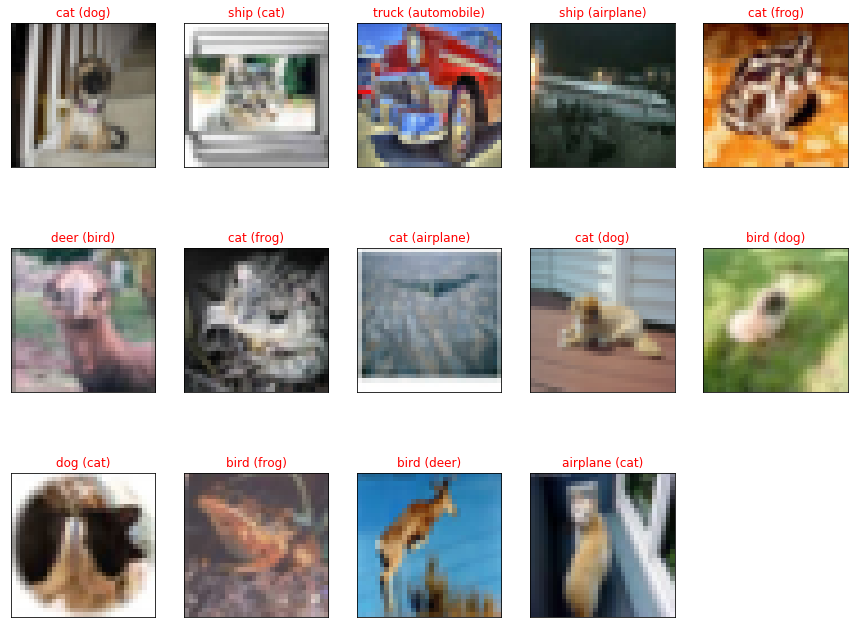

In [14]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

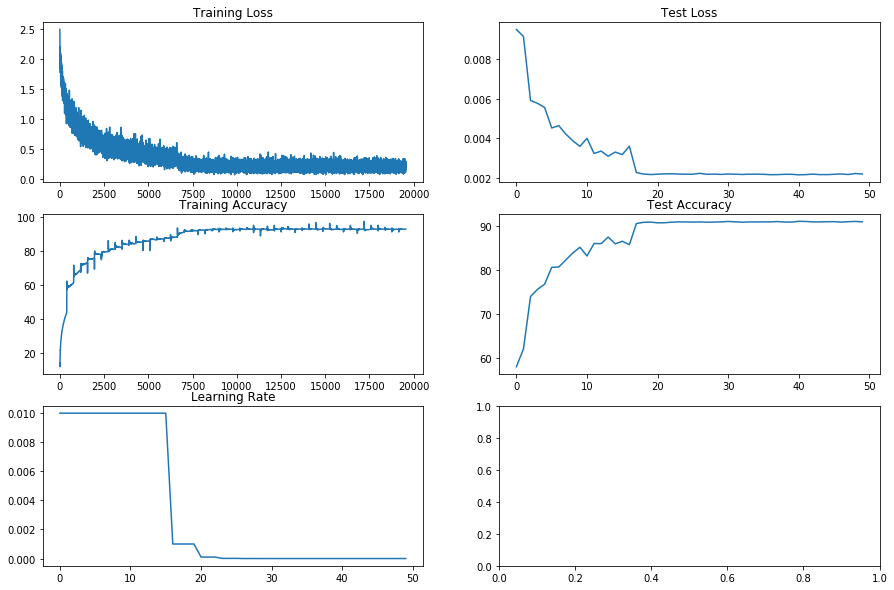

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [16]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)